In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

In [6]:
kill = pd.read_csv('PoliceKillingsUS.csv',encoding="windows-1252")
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [14]:
kill.gender.value_counts()
x= kill.gender.value_counts().index

x[0]

'M'

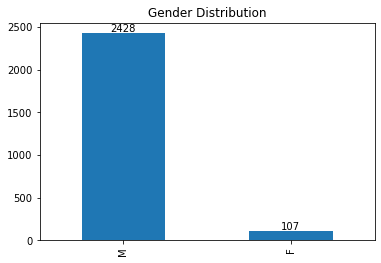

In [16]:
fig, ax = plt.subplots()

x = [0,1]
y= kill.gender.value_counts().values

kill.gender.value_counts().plot.bar( ax = ax )
ax.set_title("Gender Distribution")

for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha="center",va="bottom")
    

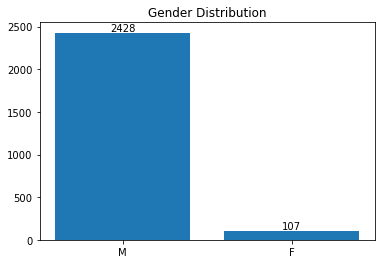

In [19]:
fig, ax = plt.subplots()

x = kill.gender.value_counts().index
y = kill.gender.value_counts().values

ax.bar(x,y )
ax.set_title("Gender Distribution")

for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha="center",va="bottom")

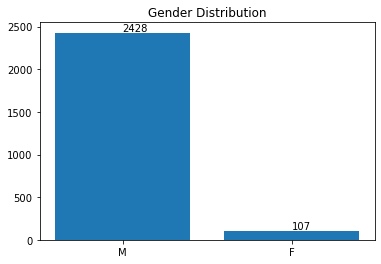

In [31]:
fig, ax = plt.subplots()

x = kill.gender.value_counts().index
y = kill.gender.value_counts().values

ax.bar(x,y )
ax.set_title("Gender Distribution")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.4, p.get_height()+20));


In [21]:
ax.patches

In [26]:
ax.patches[0].get_x()

-0.4

In [42]:
arm = kill.armed.value_counts()[:7]
arm

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

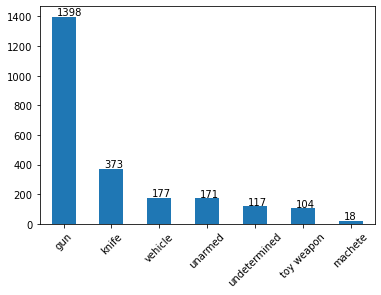

In [55]:
fig, ax = plt.subplots()

arm.plot(kind="bar", ax = ax)

ax.set_xticklabels(arm.index, rotation = 45)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+10));


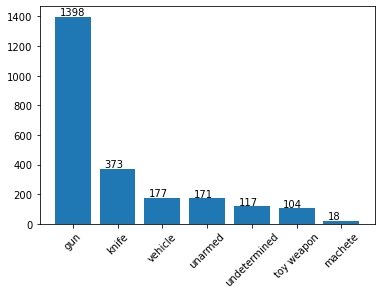

In [56]:
fig, ax = plt.subplots()
x=arm.index
y=arm.values

ax.bar(x,y)
ax.set_xticklabels(arm.index, rotation = 45)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+10));


In [59]:
kill['age_cat']=kill.age.apply(lambda x: 'above25' if x>25 else 'below25')
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [94]:
under = kill[kill["age"]<=25].count()
under[0]

553

In [95]:
upper = kill[kill["age"]>25].count()
upper[0]

1905

In [71]:
kill.age.isnull().sum()

77

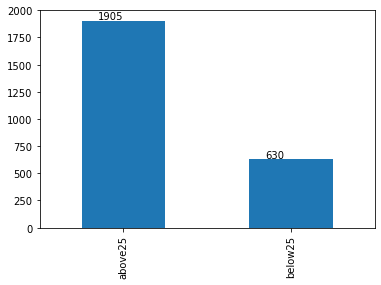

In [62]:
ax = kill.age_cat.value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+10));

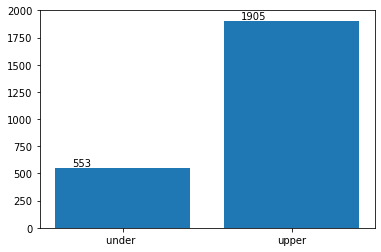

In [96]:
x = [under[0],upper[0]]
y=["under ", "upper"]
fig , ax = plt.subplots()
ax.bar(y,x)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+10));

In [97]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [98]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [99]:
kill.race.value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

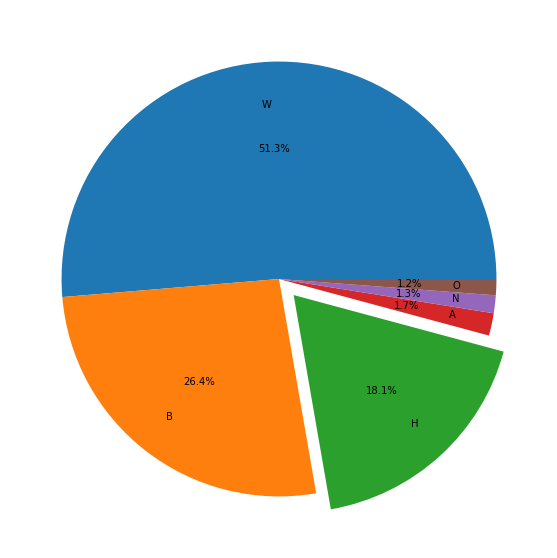

In [112]:
fig, ax = plt.subplots(figsize=(10,10))
x = kill.race.value_counts().values
label = kill.race.value_counts().index

ax.pie(x, labels= label,
      labeldistance=0.8, 
        autopct= "%.1f%%", 
    explode=[0,0,0.1,0,0,0]
      );

In [113]:
df=kill

In [114]:
df['age_cat'] = df['age'].apply(lambda x: 'above25' if x>25 else ('below25' if x <= 25 else "other"))
b = df["age_cat"][df["age_cat"] == 'below25']
b.count()

553

In [115]:
df["age_cat"][df["age_cat"] == 'above']

Series([], Name: age_cat, dtype: object)